# Introduction

Pada Final Project ini saya menggunakan data penjualan dari toko retail untuk membuat machine learning algoritma untuk mengclustering customer untuk membuat target market yang tepat sasaran.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

10 Features in this dataset consist:
1. <b>Age</b>: Customer age in years
2. <b>Gender</b>: Customer gender
3. <b>OwnHome</b>: Data shows that customer have their own house or not
4. <b>Married</b>: Customer marital status
5. <b>Location</b>: Data shows customer location range
6. <b>Salary</b>: Customer annual income (yearly bcs it show average salary per year in the US)
7. <b>Children</b>: Data shows if customer have how many children or have none
8. <b>History</b>: Remain Unknown
9. <b>Catalogs</b>: Unknown
10. <b>AmountSpent</b>: Customer Spending Score

In [2]:
# read the dataset 
df = pd.read_csv("retailMarketingDI.csv")

# Showing the data
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304.0
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671.0


In [3]:
df.to_html('dataset.html')

In [4]:
df.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,994.000000
mean,55916.600000,0.93400,14.682000,1218.188129
std,30748.392284,1.05107,6.622895,961.849079
min,0.000000,0.00000,6.000000,0.000000
25%,29200.000000,0.00000,6.000000,490.250000
50%,53700.000000,1.00000,12.000000,962.500000
75%,76925.000000,2.00000,18.000000,1688.750000
max,168800.000000,3.00000,24.000000,6217.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
History        697 non-null object
Catalogs       1000 non-null int64
AmountSpent    994 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


In [6]:
df.dtypes

Age             object
Gender          object
OwnHome         object
Married         object
Location        object
Salary           int64
Children         int64
History         object
Catalogs         int64
AmountSpent    float64
dtype: object

In [7]:
# check missing values
df.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      6
dtype: int64

### Dropping Unrelated Data

The reason for dropping History feature is because the data is really doesnt seems to connected even with the AmountSpent itself. Like for the example, the high amount of customer spend their money doesn't make it become the High in history. The other main reason is because it is consist with a lot of NaN Value.

In [8]:
df = df.drop(['History'], axis=1)

In [9]:
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,6,755.0
1,Middle,Male,Rent,Single,Close,63600,0,6,1318.0
2,Young,Female,Rent,Single,Close,13500,0,18,296.0
3,Middle,Male,Own,Married,Close,85600,1,18,2436.0
4,Middle,Female,Own,Single,Close,68400,0,12,1304.0
...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,18,384.0
996,Middle,Male,Rent,Single,Far,40500,1,18,1073.0
997,Old,Male,Own,Single,Close,44800,0,24,1417.0
998,Middle,Male,Own,Married,Close,79000,2,18,671.0


In [10]:
df.isna().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
Catalogs       0
AmountSpent    6
dtype: int64

There is a couple of NaN Value in the AmountSpent Feature. We talking about 6 NaN value. Since it is the Amount of customer spending score, we really cannot assume to replace the data even with the avreage or median of it. So i decided to drop it.

In [11]:
df.drop(index=df[df['AmountSpent'].isna()==True].index,inplace=True)

In [12]:
df.isna().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
Catalogs       0
AmountSpent    0
dtype: int64

In [13]:
df['Catalogs'].unique()

array([ 6, 18, 12, 24])

The main reason we dropped the Catalogs Feature is because the description of the data is really unclear about what Catalogs Feature is. So we make a point that Catalogs is not connected with this customer clustering.

In [14]:
df = df.drop(['Catalogs'], axis=1)
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,755.0
1,Middle,Male,Rent,Single,Close,63600,0,1318.0
2,Young,Female,Rent,Single,Close,13500,0,296.0
3,Middle,Male,Own,Married,Close,85600,1,2436.0
4,Middle,Female,Own,Single,Close,68400,0,1304.0
...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,384.0
996,Middle,Male,Rent,Single,Far,40500,1,1073.0
997,Old,Male,Own,Single,Close,44800,0,1417.0
998,Middle,Male,Own,Married,Close,79000,2,671.0


Dropping catalogs because the data is unclear. I think it is a store specific item(s) so we cannot do further more for data explorarization

# EDA

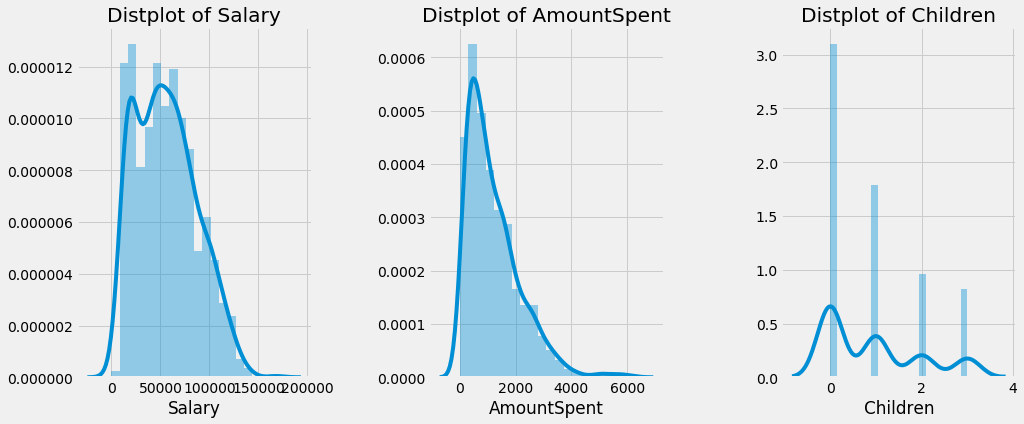

In [15]:
plt.style.use('fivethirtyeight')

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Salary' , 'AmountSpent', 'Children']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

From the Distribution Plot above, we can see that most of the cutomer data have Salaray ini between 50000 to 100000 dollars. We assume this is an annual salary (yearly).

In AmountSpent, we found that the most spender is likely to spend with the total in between 1 to 2000 dollars.

For the Children Feature, we can see that the most customer in this store have no children at all.

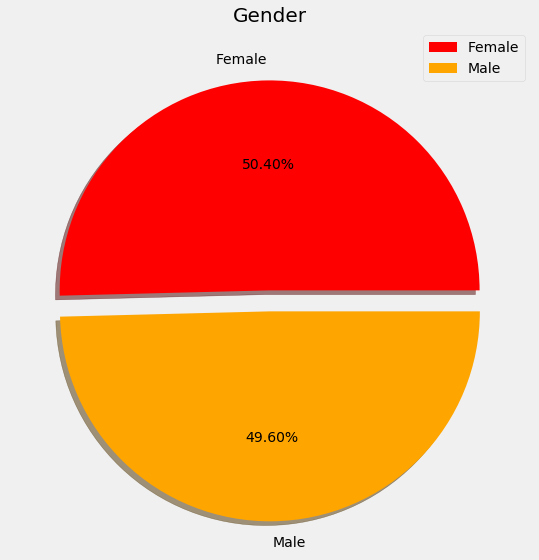

In [16]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['red', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

As we can see, the percentation of Female customer is a little bit high in the number of 50.40% and Male in 49.60% 

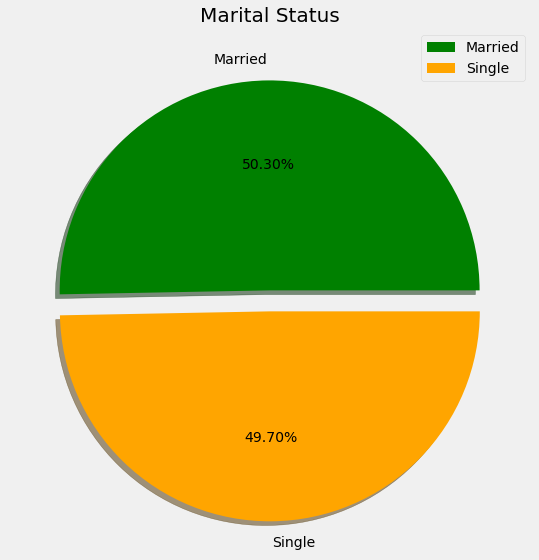

In [17]:
labels = ['Married', 'Single']
size = df['Married'].value_counts()
colors = ['green', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Marital Status', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Customer's Marital status is morelikely to be married than single. married is in 50.30% and Single in 49.70%

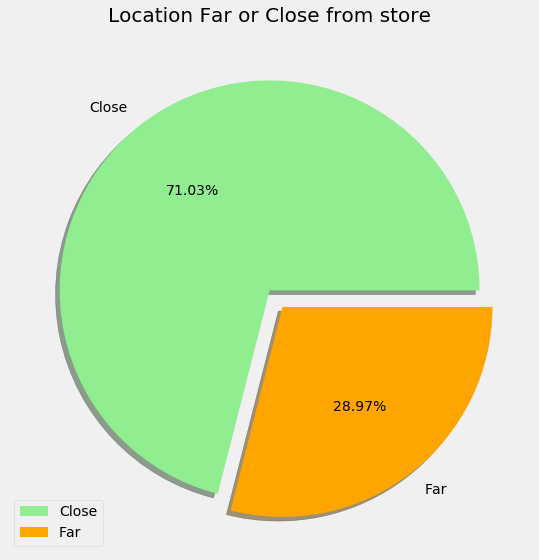

In [18]:
labels = ['Close', 'Far']
size = df['Location'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Location Far or Close from store', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

As we can see, that most of the customer in the store is living in nearest neighbourhood.

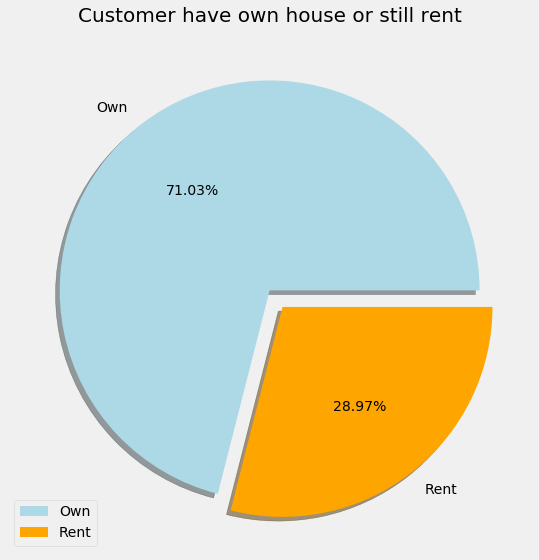

In [19]:
labels = ['Own', 'Rent']
size = df['Location'].value_counts()
colors = ['lightblue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Customer have own house or still rent', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Customer more likely have their Own House in 71.03%. Customer that still renting is on 28.97%

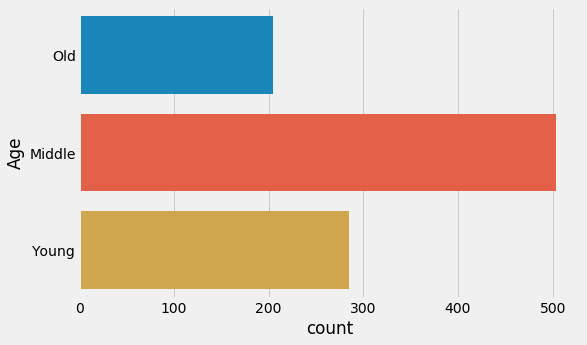

In [20]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Age' , data = df)
plt.show()

Customer is more likely in the middle age.

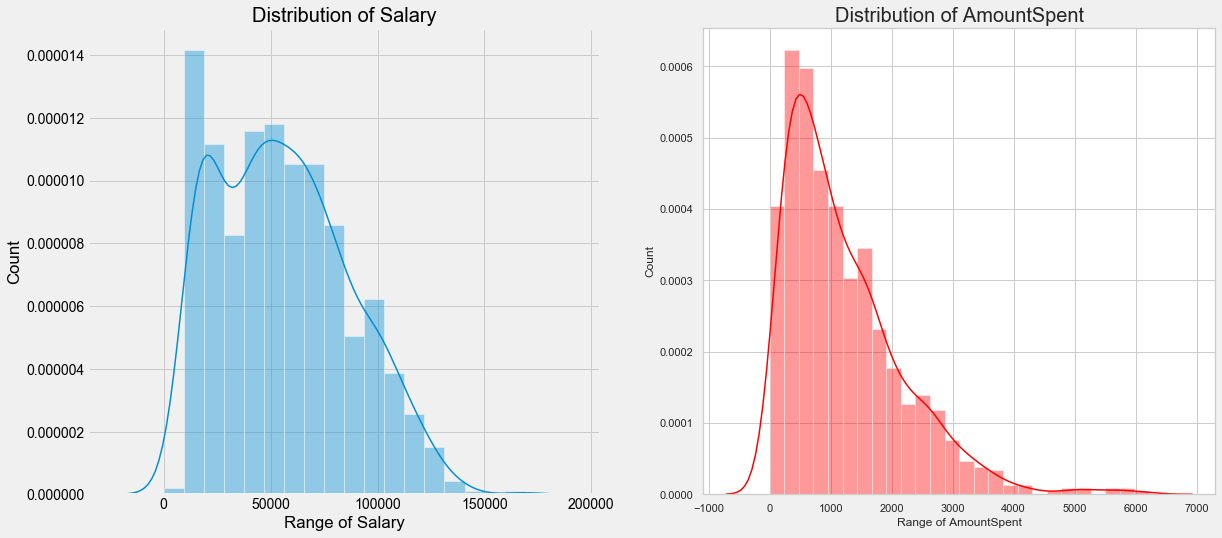

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Salary'])
plt.title('Distribution of Salary', fontsize = 20)
plt.xlabel('Range of Salary')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['AmountSpent'], color = 'red')
plt.title('Distribution of AmountSpent', fontsize = 20)
plt.xlabel('Range of AmountSpent')
plt.ylabel('Count')

plt.show()

In [22]:
df.corr()

,Salary,Children,AmountSpent
Salary,1.000000,0.044035,0.699703
Children,0.044035,1.000000,-0.222863
AmountSpent,0.699703,-0.222863,1.000000


The correlation of the data of AmountSpent related with customer salary and if customer having Children or not.

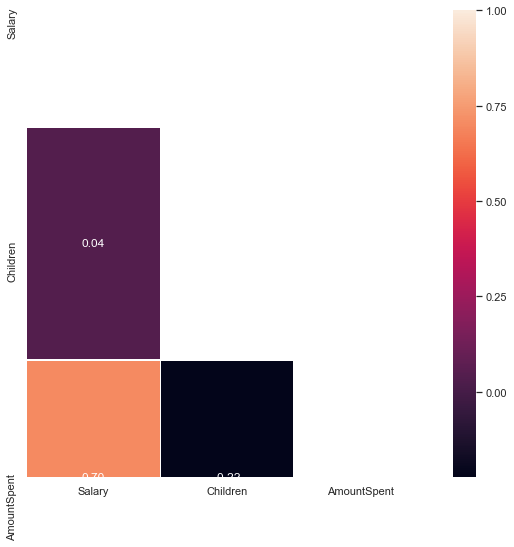

In [23]:
corr = df.corr()
fig, ax = plt.subplots(figsize= (8,8))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, linewidths = 0.5, annot=True, fmt = ".2f", mask = dropSelf)
plt.show()


Clustering the data with non numerical behavior

In [24]:
df_c = df[['Age', 'Gender', 'OwnHome', 'Married', 'Location']]

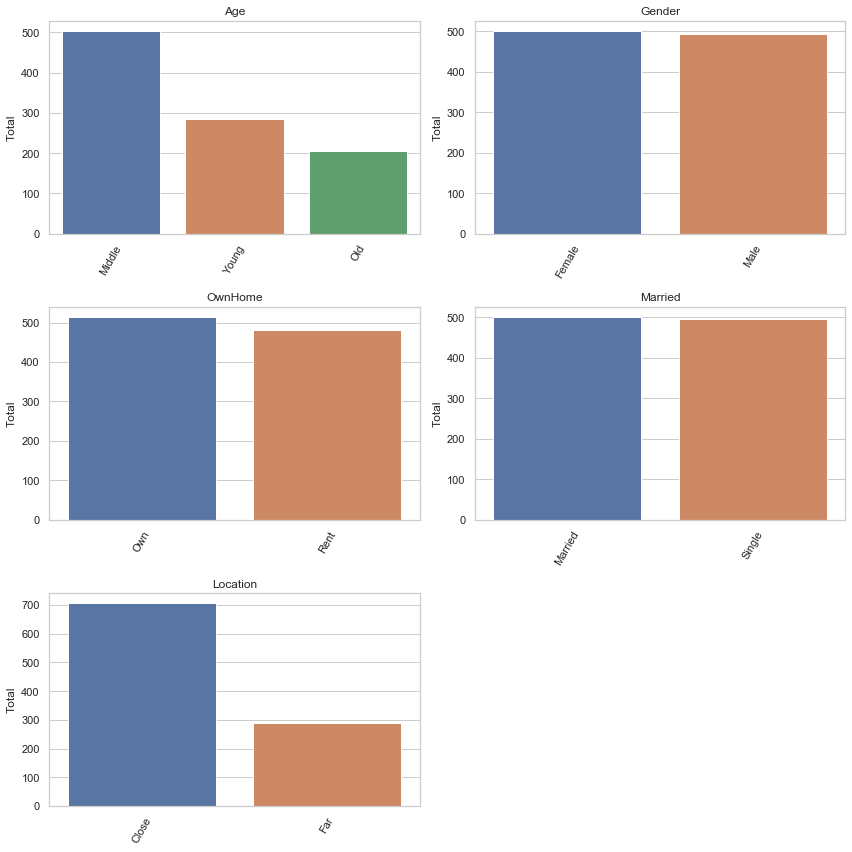

In [110]:
plt.figure(1, figsize = (12,12))
n = 0

for i in df_c.columns:
    n += 1
    plt.subplot(3, 2, n)
    cat_num = df_c[i].value_counts()
    title = cat_num.name
    cat_num.name = "Total"
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
    
    chart.y ="Total"
    plt.title(title)
    plt.tight_layout()
plt.tight_layout()
#     plt.show()

Text(0.5, 1.0, 'AmountSpent By Location and AmountSpent')

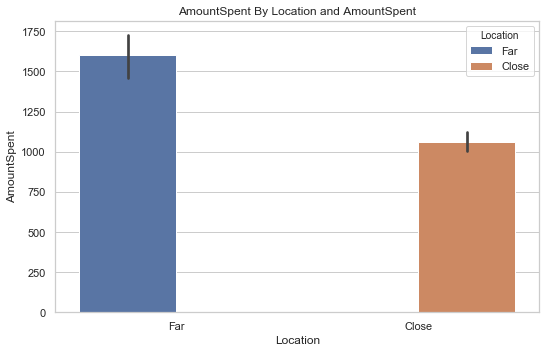

In [26]:
a = plt.figure( figsize = (17,17))
plt.subplot(3, 2, 2)
box = sns.barplot(x='Location',y='AmountSpent', hue= 'Location', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Location and AmountSpent')

### Clustering with no numerical data. (Demography)

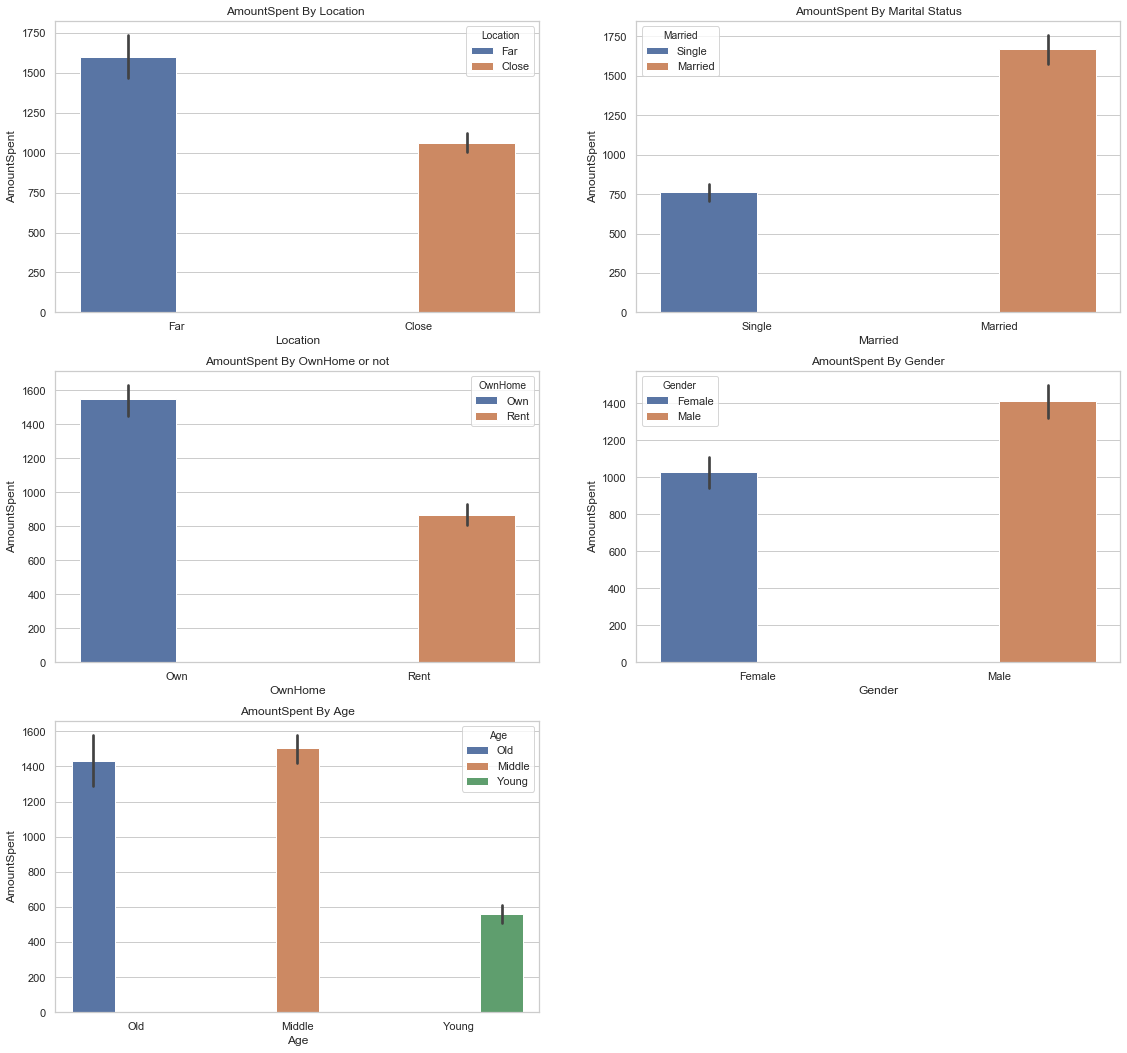

In [27]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
box = sns.barplot(x='Location',y='AmountSpent', hue= 'Location', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Location ')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Married',y='AmountSpent', hue= 'Married', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Marital Status')

plt.subplot(3, 2, 3)
box = sns.barplot(x='OwnHome',y='AmountSpent', hue= 'OwnHome', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By OwnHome or not')

plt.subplot(3, 2, 4)
box = sns.barplot(x='Gender',y='AmountSpent', hue= 'Gender', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Gender')

plt.subplot(3, 2, 5)
box = sns.barplot(x='Age',y='AmountSpent', hue= 'Age', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent By Age')


plt.tight_layout(pad=2, h_pad=3, w_pad=1, rect=(3,100,10,3))

### AmountSpent based on Marital Status and Location

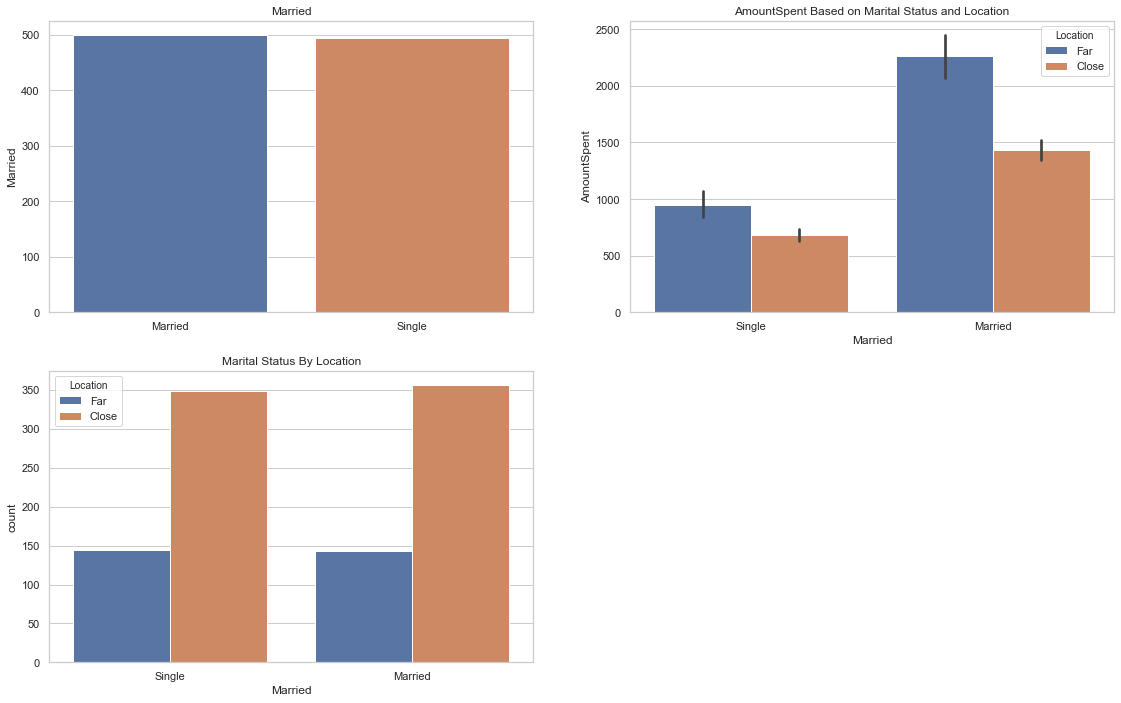

In [28]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_c['Married'].value_counts().index, y=df_c['Married'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Married')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Married',y='AmountSpent', hue= 'Location', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent Based on Marital Status and Location')

plt.subplot(3, 2, 3)
sns.countplot('Married', data = df, hue = 'Location')
plt.title('Marital Status By Location')

plt.tight_layout(pad=2, h_pad=3, w_pad=1, rect=(3,100,10,3))

### AmountSpent by Home and Age

Owning houses and age is realated

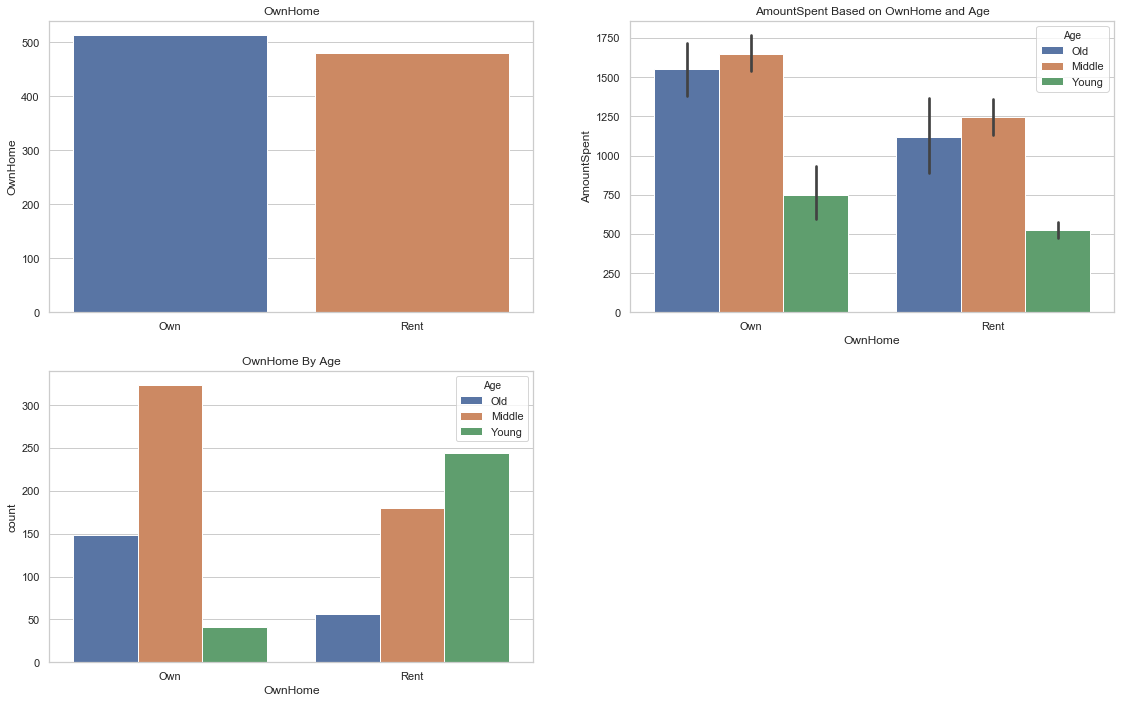

In [29]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_c['OwnHome'].value_counts().index, y=df_c['OwnHome'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('OwnHome')

plt.subplot(3, 2, 2)
box = sns.barplot(x='OwnHome',y='AmountSpent', hue= 'Age', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent Based on OwnHome and Age')

plt.subplot(3, 2, 3)
sns.countplot('OwnHome', data = df, hue = 'Age')
plt.title('OwnHome By Age')

plt.tight_layout(pad=2, h_pad=3, w_pad=1, rect=(3,100,10,3))

### AmountSpent by Location and Home Status

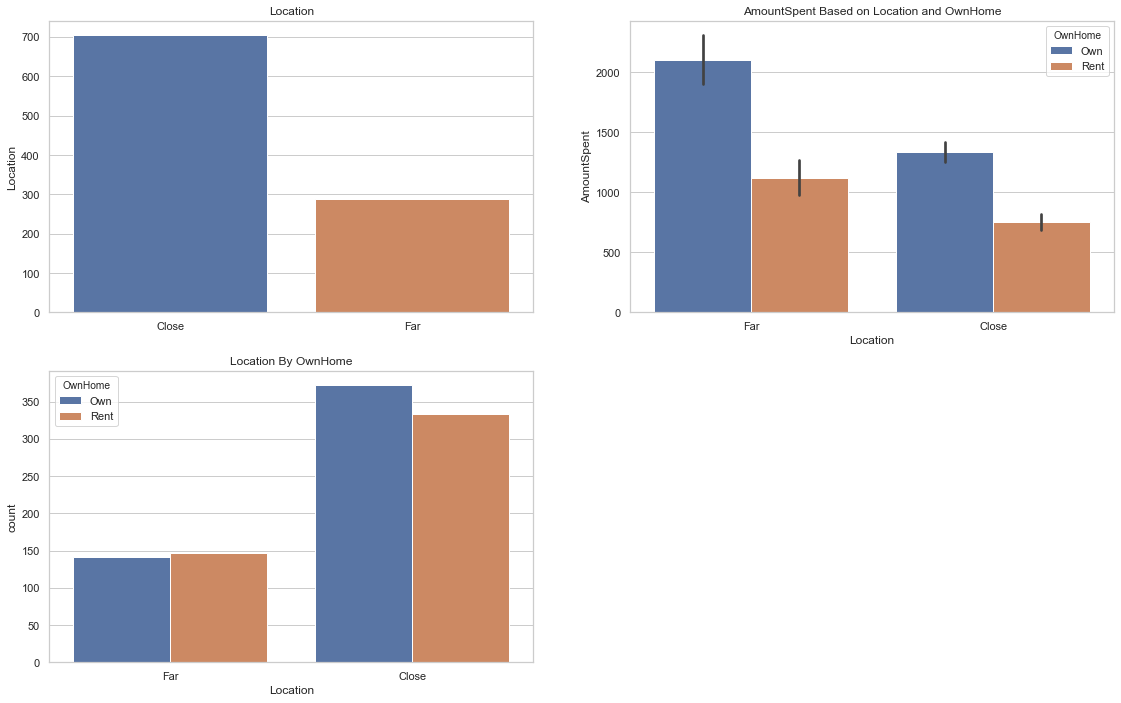

In [30]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_c['Location'].value_counts().index, y=df_c['Location'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Location')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Location',y='AmountSpent', hue= 'OwnHome', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent Based on Location and OwnHome')

plt.subplot(3, 2, 3)
sns.countplot('Location', data = df, hue = 'OwnHome')
plt.title('Location By OwnHome')

plt.tight_layout(pad=2, h_pad=3, w_pad=1, rect=(3,100,10,3))

### AmountSpent based on Age and Gender

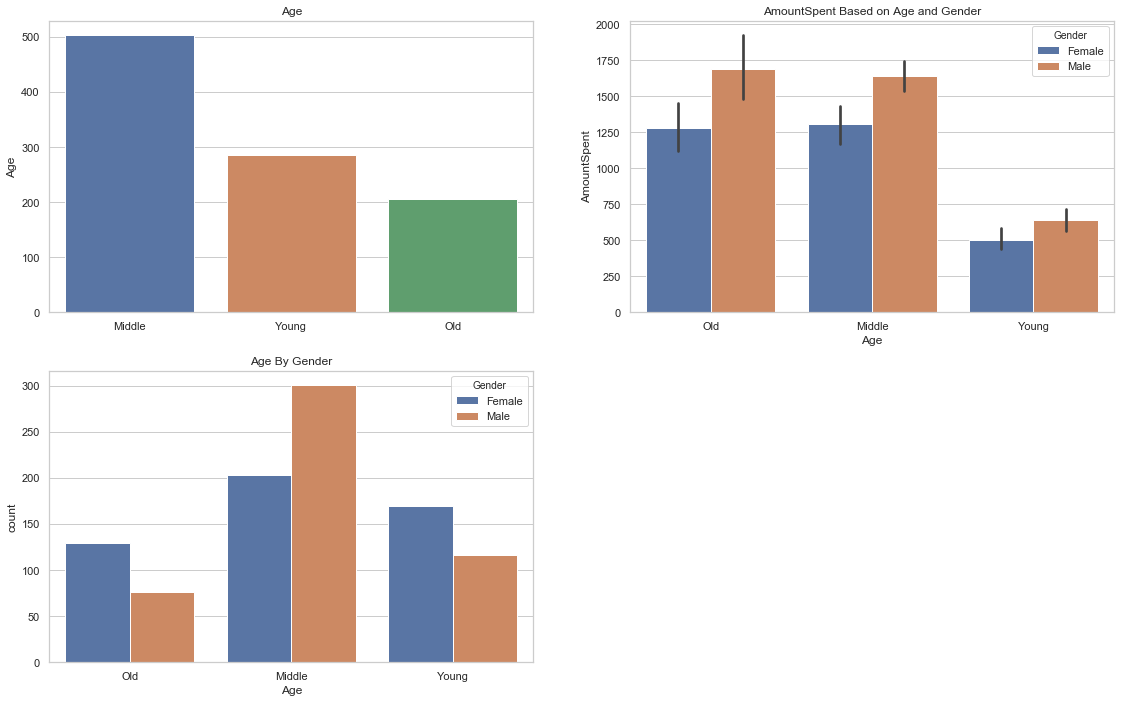

In [31]:
a = plt.figure( figsize = (17,17))

plt.subplot(3, 2, 1)
chart = sns.barplot(x=df_c['Age'].value_counts().index, y=df_c['Age'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Age')

plt.subplot(3, 2, 2)
box = sns.barplot(x='Age',y='AmountSpent', hue= 'Gender', data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent Based on Age and Gender')

plt.subplot(3, 2, 3)
sns.countplot('Age', data = df, hue = 'Gender')
plt.title('Age By Gender')

plt.tight_layout(pad=2, h_pad=3, w_pad=1, rect=(3,100,10,3))

# Modeling

In [32]:
df_params = df[['Salary', 'AmountSpent','Children']]

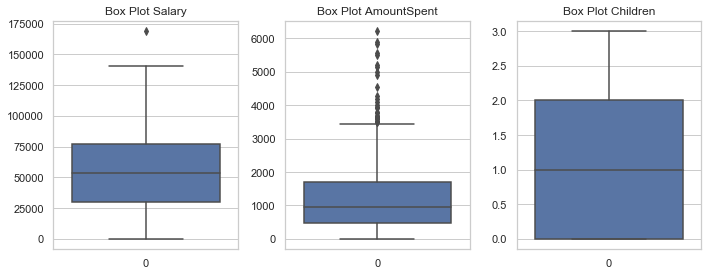

In [33]:
f, axes = plt.subplots(1, 3, figsize = (10,4))

sns.boxplot(data = df_params['Salary'], ax = axes[0]).set_title('Box Plot Salary')
sns.boxplot(data = df_params['AmountSpent'], ax = axes[1]).set_title('Box Plot AmountSpent')
sns.boxplot(data = df_params['Children'], ax = axes[2]).set_title('Box Plot Children')

plt.tight_layout()

In [34]:
from mahalanobis import Mahalanobis
from scipy.stats import chi2

In [35]:
df_params['mahala_pack'] = Mahalanobis(np.array(df_params),len(df_params)).distances

In [36]:
df_params['p-value'] = 1 - chi2.cdf(df_params['mahala_pack'], 2)

In [37]:
def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'Not-outlier'
df_params['Out'] = df_params['p-value'].apply(name_outlier)

<Figure size 1800x1800 with 0 Axes>

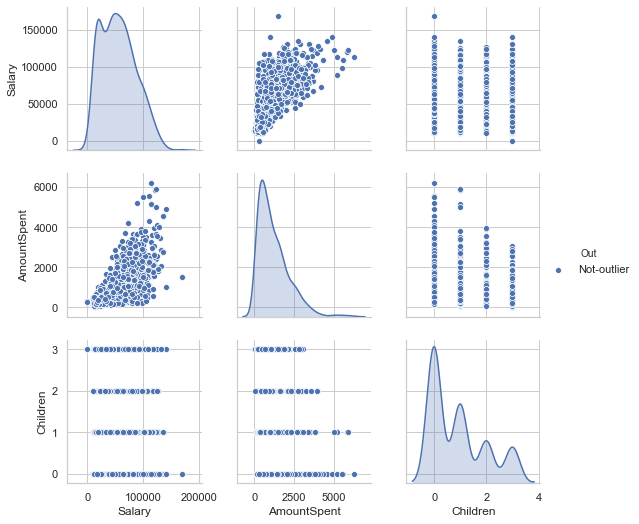

In [38]:
plt.figure( figsize = (25,25))

sns.pairplot(df_params[['Salary', 'AmountSpent', 'Children', 'Out']], hue = 'Out')

In [39]:
df[df_params['Out'] == 'Outlier']

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent


# Handling Outlier

### Scalling

In [40]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [41]:
df_params['Salary_scl'] = StandardScaler().fit_transform(df_params[['Salary']])
df_params['AmountSpent_scl'] = StandardScaler().fit_transform(df_params[['AmountSpent']])
df_params['Children_scl'] = StandardScaler().fit_transform(df_params[['Children']])
# df_num['Mortgage Scl'] = StandardScaler().fit_transform(df_num[['Mortgage']])

### K-Means Clustering

In [42]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [43]:
k = range(1, 10)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df_params[['Salary_scl', 'AmountSpent_scl', 'Children_scl']])
    inertia.append(model.inertia_)
print(k)
print(inertia)

range(1, 10)
[2982.000000000001, 1833.9234608014813, 1223.4626084168397, 975.1094881345126, 783.6691284177264, 685.0815020772335, 610.7501354775936, 550.0435384655058, 496.3779309198734]


Text(4, 600, 'Best K value = 3')

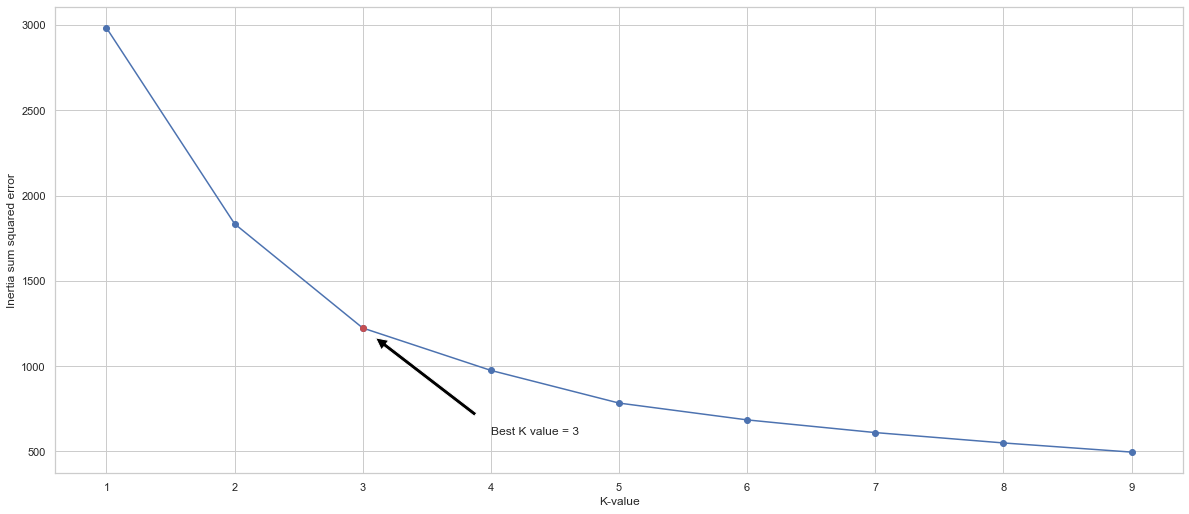

In [44]:
plt.plot(k, inertia, marker='o')
plt.xlabel('K-value')
plt.ylabel('Inertia sum squared error')
plt.plot(k[2], inertia[2], 'ro')
plt.annotate(
'Best K value = 3', xy = (k[2], inertia[2]), xytext = (4, 600),
arrowprops = dict(facecolor = 'black', shrink = 0.1))

In [45]:
model_KM = KMeans(n_clusters = 3, random_state = 0, max_iter = 1000) # tingkatkan itersai untuk meningkatkan kualitas prediksi

model_KM.fit(df_params[['Salary_scl', 'AmountSpent_scl', 'Children_scl']])

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [46]:
df_params['Cluster'] = model_KM.predict(df_params[['Salary_scl', 'AmountSpent_scl', 'Children_scl']])
df_params

,Salary,AmountSpent,Children,mahala_pack,p-value,Out,Salary_scl,AmountSpent_scl,Children_scl,Cluster
0,47500,755.0,0,1.191410,0.551174,Not-outlier,-0.277875,-0.481803,-0.883974,2
1,63600,1318.0,0,1.029336,0.597699,Not-outlier,0.246436,0.103823,-0.883974,2
2,13500,296.0,0,1.638959,0.440661,Not-outlier,-1.385116,-0.959249,-0.883974,2
3,85600,2436.0,1,1.317905,0.517393,Not-outlier,0.962886,1.266753,0.072142,1
4,68400,1304.0,0,1.172905,0.556297,Not-outlier,0.402752,0.089260,-0.883974,2
...,...,...,...,...,...,...,...,...,...,...
995,19400,384.0,1,1.199488,0.548952,Not-outlier,-1.192977,-0.867712,0.072142,2
996,40500,1073.0,1,0.616654,0.734675,Not-outlier,-0.505836,-0.151023,0.072142,2
997,44800,1417.0,0,1.009941,0.603523,Not-outlier,-0.365803,0.206802,-0.883974,2
998,79000,671.0,2,1.769910,0.412733,Not-outlier,0.747951,-0.569178,1.028257,0


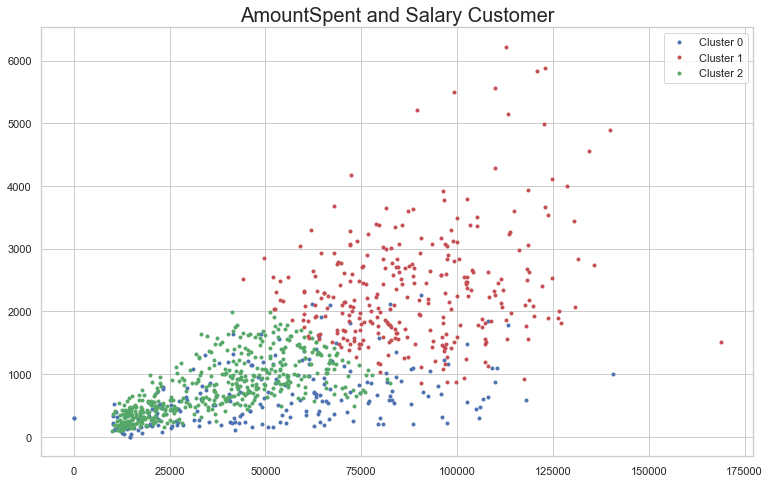

In [47]:
a = plt.figure( figsize = (25,25))

plt.subplot(3, 2, 1)
a_0 = plt.plot(df_params['Salary'][df_params['Cluster'] == 0], df_params['AmountSpent'][df_params['Cluster'] == 0], 'b.')
a_1 = plt.plot(df_params['Salary'][df_params['Cluster'] == 1], df_params['AmountSpent'][df_params['Cluster'] == 1], 'r.')
a_2 = plt.plot(df_params['Salary'][df_params['Cluster'] == 2], df_params['AmountSpent'][df_params['Cluster'] == 2], 'g.')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'), loc='best')
plt.title('AmountSpent and Salary Customer', fontsize = 20)

plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('2d.png')


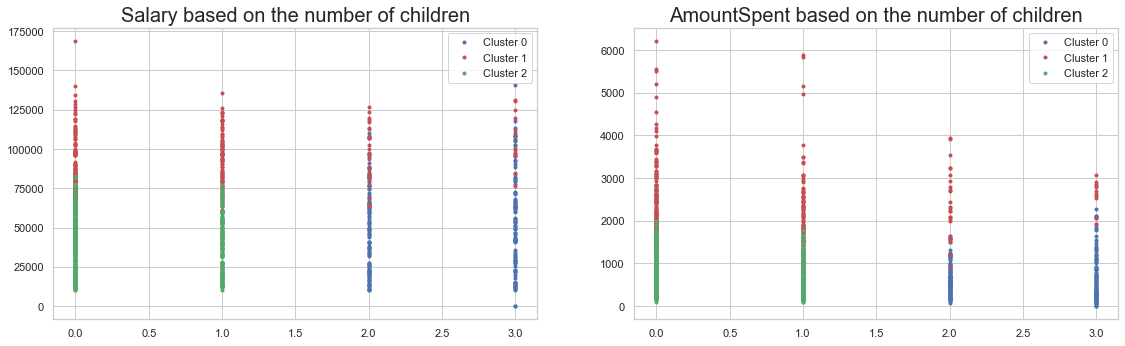

In [48]:
a = plt.figure( figsize = (17,17))


plt.subplot(3, 2, 1)
b_0 = plt.plot(df_params['Children'][df_params['Cluster'] == 0], df_params['Salary'][df_params['Cluster'] == 0], 'b.')
b_1 = plt.plot(df_params['Children'][df_params['Cluster'] == 1], df_params['Salary'][df_params['Cluster'] == 1], 'r.')
b_2 = plt.plot(df_params['Children'][df_params['Cluster'] == 2], df_params['Salary'][df_params['Cluster'] == 2], 'g.')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'), loc='best')
plt.title('Salary based on the number of children', fontsize = 20)

plt.subplot(3, 2, 2)
c_0 = plt.plot(df_params['Children'][df_params['Cluster'] == 0], df_params['AmountSpent'][df_params['Cluster'] == 0], 'b.')
c_1 = plt.plot(df_params['Children'][df_params['Cluster'] == 1], df_params['AmountSpent'][df_params['Cluster'] == 1], 'r.')
c_2 = plt.plot(df_params['Children'][df_params['Cluster'] == 2], df_params['AmountSpent'][df_params['Cluster'] == 2], 'g.')
plt.legend(('Cluster 0', 'Cluster 1', 'Cluster 2'), loc='best')
plt.title('AmountSpent based on the number of children', fontsize = 20)



# plt.subplot(3, 2, 3)
# sns.countplot('Checking account', data = df, hue = 'Purpose')

plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('2d.png')

In [49]:
from mpl_toolkits.mplot3d import Axes3D

K-MEANS


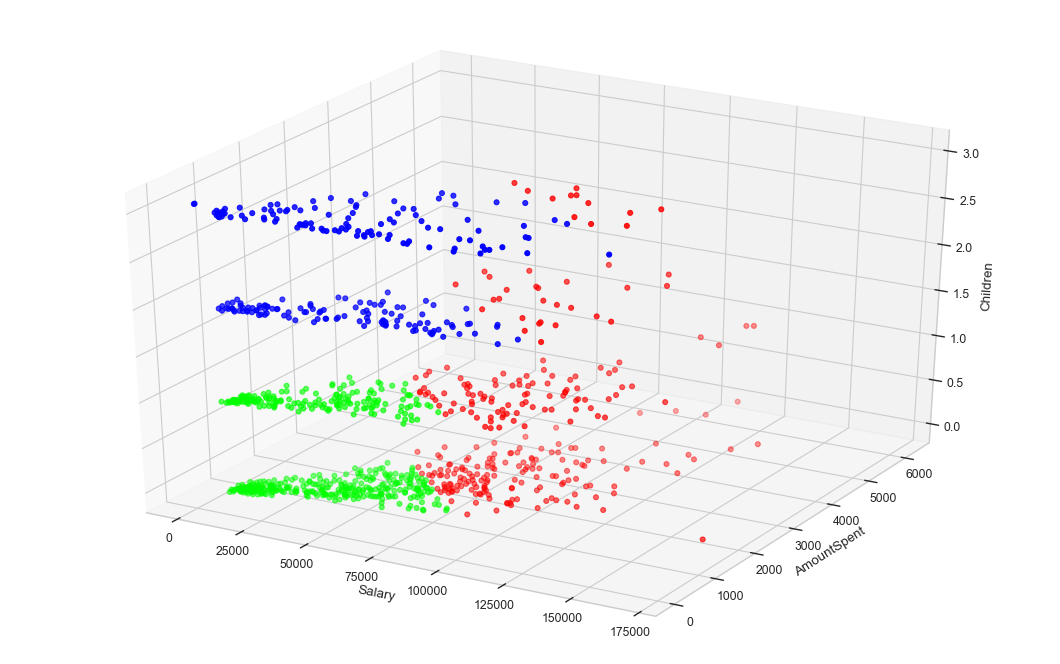

In [50]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df['Salary'],df['AmountSpent'],df['Children'],c=df_params['Cluster'], cmap='brg')

xLabel = ax.set_xlabel('Salary', linespacing=3.2)
yLabel = ax.set_ylabel('AmountSpent', linespacing=3.1)
zLabel = ax.set_zlabel('Children', linespacing=3.4)

print("K-MEANS")
fig.savefig('3d.png')

### DBSCAN Clustering

In [51]:
from sklearn.cluster import DBSCAN 

In [52]:
db_default = DBSCAN(eps = 0.5, min_samples = 4).fit(df_params[['Salary_scl', 'AmountSpent_scl', 'Children_scl']]) 
labels = db_default.labels_

In [53]:
pd.DataFrame(labels)[0].unique()

array([ 0,  1,  2, -1,  3,  4,  5])

In [54]:
from mpl_toolkits.mplot3d import Axes3D

DBSCAN


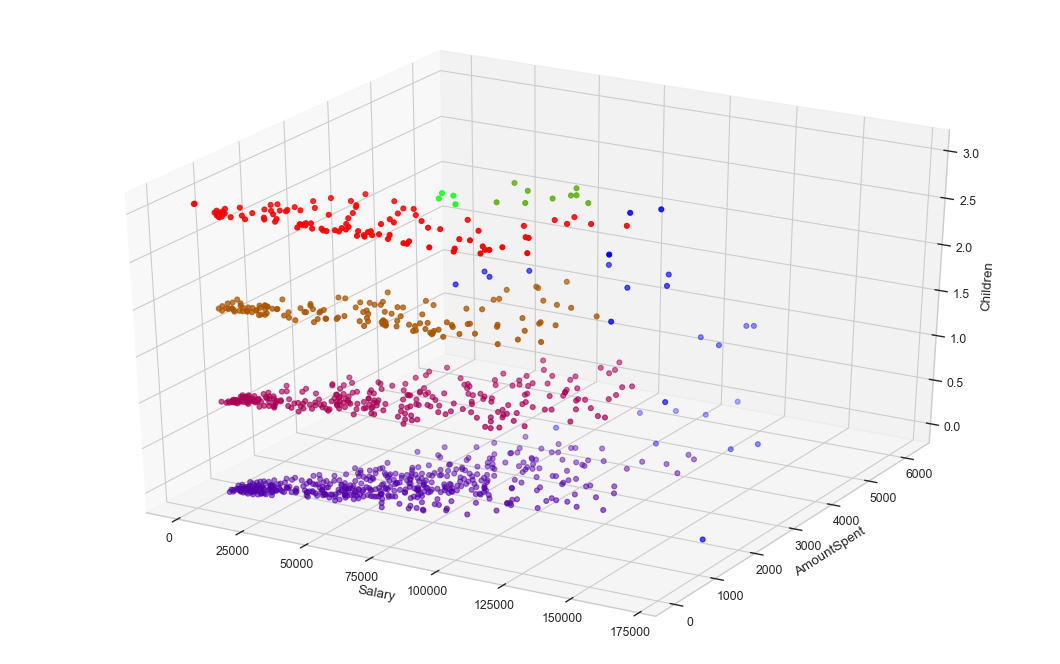

In [55]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df['Salary'],df['AmountSpent'],df['Children'],c=labels, cmap='brg')

xLabel = ax.set_xlabel('Salary', linespacing=3.2)
yLabel = ax.set_ylabel('AmountSpent', linespacing=3.1)
zLabel = ax.set_zlabel('Children', linespacing=3.4)

print("DBSCAN")

In [56]:
kmeans_labels = model_KM.labels_

In [57]:
df_clustered = df.assign(Cluster=kmeans_labels)

In [58]:
df_clustered.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent,Cluster
0,Old,Female,Own,Single,Far,47500,0,755.0,2
1,Middle,Male,Rent,Single,Close,63600,0,1318.0,2
2,Young,Female,Rent,Single,Close,13500,0,296.0,2
3,Middle,Male,Own,Married,Close,85600,1,2436.0,1
4,Middle,Female,Own,Single,Close,68400,0,1304.0,2


# Making DataFrame of the Target

In [76]:
cluster0_index = df_clustered[(df_clustered['Cluster'] == 0)].index
cluster1_index = df_clustered[(df_clustered['Cluster'] == 1)].index
cluster2_index = df_clustered[(df_clustered['Cluster'] == 2)].index


In [77]:
cluster0_index

Int64Index([  8,  20,  25,  26,  28,  35,  36,  40,  60,  74,
            ...
            959, 961, 970, 972, 976, 978, 980, 981, 988, 998],
           dtype='int64', length=227)

### Cluster Explanation

- Cluster 0: Customer with high salary and have more than 2 children, is more likely less spent their money in the store.
- Cluster 1: Customer with highest salary and have 0-1 children, is the highest spender in the store.
- Cluster 2: Customer with relatively low salary and hv at least 1 max children, is more likely to spent their money on the store than the Cluster 0.

In [78]:
grouped_kmeans = df_clustered.groupby(['Cluster'])
grouped_kmeans.mean().round(1)

,Salary,Children,AmountSpent
Cluster,,,
0,50814.5,2.5,628.1
1,88813.9,0.6,2347.0
2,37946.3,0.4,793.2


In [62]:
df_params.describe()

,Salary,AmountSpent,Children,mahala_pack,p-value,Salary_scl,AmountSpent_scl,Children_scl,Cluster
count,994.000000,994.000000,994.000000,994.000000,994.000000,9.940000e+02,9.940000e+02,9.940000e+02,994.000000
mean,56032.696177,1218.188129,0.924547,1.574751,0.481117,-9.675359e-18,4.099113e-17,5.178342e-17,1.245473
std,30722.419449,961.849079,1.046425,0.721583,0.145794,1.000503e+00,1.000503e+00,1.000503e+00,0.801625
min,0.000000,0.000000,0.000000,0.150273,0.053310,-1.824755e+00,-1.267144e+00,-8.839739e-01,0.000000
25%,29600.000000,490.250000,0.000000,1.121413,0.377723,-8.608047e-01,-7.571921e-01,-8.839739e-01,1.000000
50%,53700.000000,962.500000,1.000000,1.418129,0.492104,-7.596636e-02,-2.659636e-01,7.214150e-02,1.000000
75%,76975.000000,1688.750000,2.000000,1.947186,0.570806,6.820051e-01,4.894726e-01,1.028257e+00,2.000000
max,168800.000000,6217.000000,3.000000,5.863277,0.927617,3.672369e+00,5.199702e+00,1.984372e+00,2.000000


In [63]:
grouped_kmeans.get_group(0).min()

Age             Middle
Gender          Female
OwnHome            Own
Married        Married
Location         Close
Salary               0
Children             2
AmountSpent          0
Cluster              0
dtype: object

In [64]:
grouped_kmeans.get_group(1).min()

Age             Middle
Gender          Female
OwnHome            Own
Married        Married
Location         Close
Salary           44200
Children             0
AmountSpent        863
Cluster              1
dtype: object

In [65]:
grouped_kmeans.get_group(2).min()

Age             Middle
Gender          Female
OwnHome            Own
Married        Married
Location         Close
Salary           10100
Children             0
AmountSpent         90
Cluster              2
dtype: object

In [66]:
grouped_kmeans.get_group(0).max()

Age             Young
Gender           Male
OwnHome          Rent
Married        Single
Location          Far
Salary         140700
Children            3
AmountSpent      2265
Cluster             0
dtype: object

In [67]:
grouped_kmeans.get_group(1).max()

Age             Young
Gender           Male
OwnHome          Rent
Married        Single
Location          Far
Salary         168800
Children            3
AmountSpent      6217
Cluster             1
dtype: object

In [68]:
grouped_kmeans.get_group(2).max()

Age             Young
Gender           Male
OwnHome          Rent
Married        Single
Location          Far
Salary          82500
Children            1
AmountSpent      1985
Cluster             2
dtype: object

# Target for Marketing Team

In [79]:
Cluster_0 = pd.DataFrame(df_clustered.loc[cluster0_index])
Cluster_0

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent,Cluster,TargetPriority
8,Middle,Female,Own,Married,Close,51900,3,158.0,0,Silver
20,Young,Female,Rent,Single,Far,14300,2,194.0,0,Silver
25,Middle,Female,Own,Married,Close,92300,3,655.0,0,Silver
26,Middle,Male,Own,Single,Close,62800,3,707.0,0,Silver
28,Middle,Female,Rent,Married,Close,66900,2,769.0,0,Silver
...,...,...,...,...,...,...,...,...,...,...
978,Middle,Male,Own,Married,Far,93000,3,1046.0,0,Silver
980,Old,Female,Own,Single,Close,33000,3,700.0,0,Silver
981,Middle,Female,Own,Single,Close,36900,2,514.0,0,Silver
988,Middle,Female,Rent,Single,Close,32100,2,405.0,0,Silver


### Labeling Customer (Membership for marketing purposes)

Text(0.5, 1.0, 'AmountSpent by Home Status and Location in Platinum Priority')

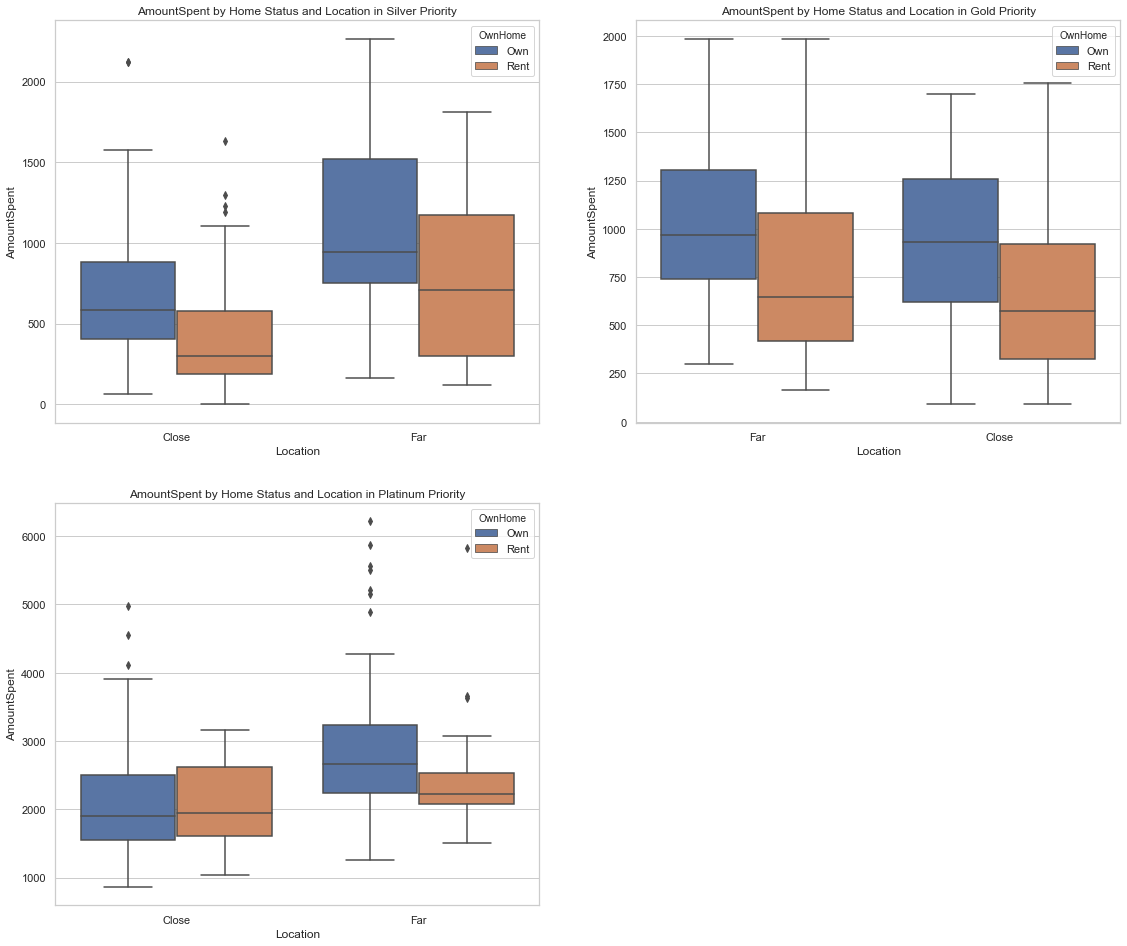

In [100]:
a = plt.figure( figsize = (17,40))

plt.subplot(5, 2, 1)
box = sns.boxplot(x = 'Location',y = 'AmountSpent', hue = 'OwnHome', data=Cluster_0)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent by Home Status and Location in Silver Priority')

plt.subplot(5, 2, 2)
box = sns.boxplot(x = 'Location',y = 'AmountSpent', hue = 'OwnHome', data=Cluster_2)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent by Home Status and Location in Gold Priority')

plt.subplot(5, 2, 3)
box = sns.boxplot(x = 'Location',y = 'AmountSpent', hue = 'OwnHome', data=Cluster_1)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent by Home Status and Location in Platinum Priority')

In [80]:
Cluster_1 = pd.DataFrame(df_clustered.loc[cluster1_index])
Cluster_1

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent,Cluster,TargetPriority
3,Middle,Male,Own,Married,Close,85600,1,2436.0,1,Platinum
9,Old,Male,Own,Married,Far,80700,0,3034.0,1,Platinum
11,Middle,Male,Own,Married,Far,111800,3,2065.0,1,Platinum
13,Middle,Male,Own,Married,Close,111400,0,2136.0,1,Platinum
14,Old,Female,Own,Married,Far,110000,0,5564.0,1,Platinum
...,...,...,...,...,...,...,...,...,...,...
987,Old,Male,Own,Married,Far,112900,0,6217.0,1,Platinum
989,Middle,Male,Own,Married,Far,102700,1,3785.0,1,Platinum
990,Middle,Male,Own,Married,Close,123800,2,3537.0,1,Platinum
992,Middle,Male,Own,Married,Close,101700,1,941.0,1,Platinum


In [81]:
Cluster_2 = pd.DataFrame(df_clustered.loc[cluster2_index])
Cluster_2

,Age,Gender,OwnHome,Married,Location,Salary,Children,AmountSpent,Cluster,TargetPriority
0,Old,Female,Own,Single,Far,47500,0,755.0,2,Gold
1,Middle,Male,Rent,Single,Close,63600,0,1318.0,2,Gold
2,Young,Female,Rent,Single,Close,13500,0,296.0,2,Gold
4,Middle,Female,Own,Single,Close,68400,0,1304.0,2,Gold
5,Young,Male,Own,Married,Close,30400,0,495.0,2,Gold
...,...,...,...,...,...,...,...,...,...,...
994,Young,Male,Rent,Single,Close,17600,0,273.0,2,Gold
995,Young,Female,Rent,Single,Close,19400,1,384.0,2,Gold
996,Middle,Male,Rent,Single,Far,40500,1,1073.0,2,Gold
997,Old,Male,Own,Single,Close,44800,0,1417.0,2,Gold


### As we can see, Cluster 1 is gonna be Platinum priority, Cluster 2 is Gold Priority, and Cluster 0 is Silver Priority

In [72]:
def label(data):
    if data == 0:
        return 'Silver'
    if data == 1:
        return 'Platinum'
    if data == 2:
        return 'Gold'

In [73]:
df_clustered['TargetPriority'] = df_clustered['Cluster'].apply(label)

### The difference between each of the cluster for the clustering

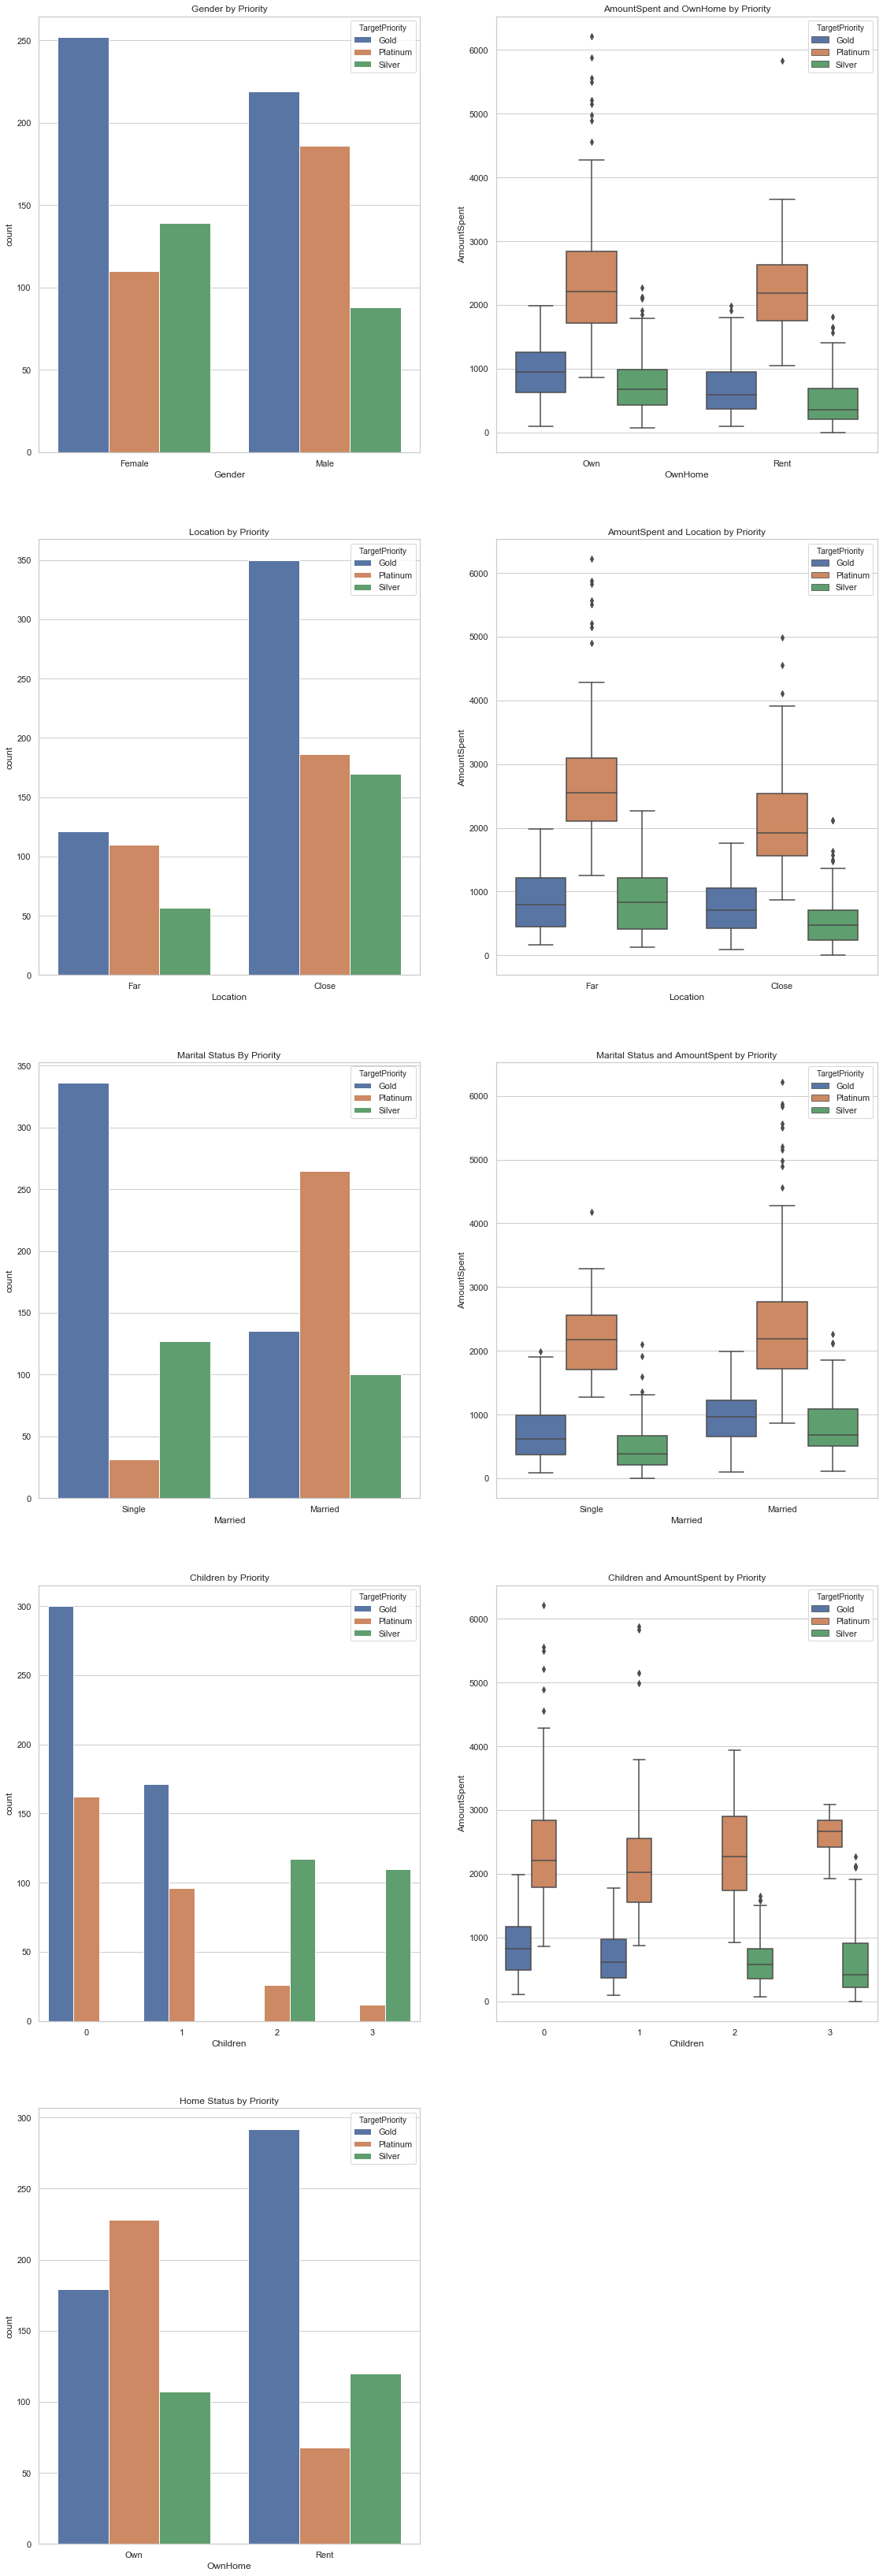

In [108]:
a = plt.figure( figsize = (17,55))

plt.subplot(5, 2, 1)
chart = sns.countplot('Gender', data = df_clustered, hue = 'TargetPriority')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Gender by Priority')

plt.subplot(5, 2, 2)
box = sns.boxplot(x = 'OwnHome',y = 'AmountSpent', hue = 'TargetPriority', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent and OwnHome by Priority')

plt.subplot(5, 2, 3)
chart = sns.countplot('Location', data = df_clustered, hue = 'TargetPriority')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Location by Priority')

plt.subplot(5, 2, 4)
box = sns.boxplot(x = 'Location',y = 'AmountSpent', hue = 'TargetPriority', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('AmountSpent and Location by Priority')

plt.subplot(5, 2, 5)
chart = sns.countplot('Married', data = df_clustered, hue = 'TargetPriority')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Marital Status By Priority')

plt.subplot(5, 2, 6)
box = sns.boxplot(x = 'Married',y = 'AmountSpent', hue = 'TargetPriority', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Marital Status and AmountSpent by Priority')

plt.subplot(5, 2, 7)
chart = sns.countplot('Children', data = df_clustered, hue = 'TargetPriority')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Children by Priority')

plt.subplot(5, 2, 8)
box = sns.boxplot(x = 'Children',y = 'AmountSpent', hue = 'TargetPriority', data=df_clustered)
box.set_xticklabels(box.get_xticklabels(), rotation=0)
plt.title('Children and AmountSpent by Priority')

plt.subplot(5, 2, 9)
chart = sns.countplot('OwnHome', data = df_clustered, hue = 'TargetPriority')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title('Home Status by Priority')

plt.tight_layout(pad=2, h_pad=1, w_pad=1, rect=(3,100,10,3))
a.savefig('catclus.png')